In [1]:
# import functions from keras and sklearn
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# graphic color
plt.rcParams['patch.force_edgecolor'] = True
# style
plt.style.use('fivethirtyeight')
# graphics
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
# make shell interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'
# not display more than 50 columns
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('air_quality.csv', sep= ' ')
df.head()

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN


In [4]:
# convert TIME to datetime format
def combine_date(df, tab_name):
    list_tab= []
    for i in range(df.shape[0]):
        list_tab.append(df.loc[i, 'Tanggal'] + 'T' + df.loc[i, tab_name][0:2])
    return np.array(list_tab, dtype= 'datetime64')

# convert TIME to datetime format
df['Datetime']= combine_date(df, 'Jam')
df.head()

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22,Datetime
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN,2019-05-19 00:00:00
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN,2019-05-19 00:00:00
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN,2019-05-19 00:00:00
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN,2019-05-19 00:00:00
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN,2019-05-19 01:00:00


In [5]:
# convert TIME to datetime format
def combine_date(df, tab_name):
    list_tab= []
    for i in range(df.shape[0]):
        list_tab.append(df.loc[i, 'Tanggal'] + 'T' + df.loc[i, tab_name][0:2])
    return np.array(list_tab, dtype= 'datetime64')
df['Datetime']= combine_date(df, 'Jam')
df.head()

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22,Datetime
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN,2019-05-19 00:00:00
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN,2019-05-19 00:00:00
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN,2019-05-19 00:00:00
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN,2019-05-19 00:00:00
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN,2019-05-19 01:00:00


In [6]:
# convert into hourly data

df= df[['Datetime', 'O3', 'CO', 'NO2', 'SO2', 'NO', 'CO2', 'VOC', 'PM1', 'PM2.5', 'PM4', 'PM10', 'TSP', 'TEMP', 'HUM', 'WS', 'WD', 'ISPU']]
df2= df.groupby(['Datetime']).mean()
df2.head()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
Datetime,,,,,,,,,,,,,,,,,
2019-05-19 00:00:00,11.797500,0.667500,15.720,9.7300,34.32175,399.135000,439.22300,0.0,0.0,0.0,7.157500,0.0,37.225000,171.850000,0.28125,3.500000,10.000000
2019-05-19 01:00:00,3.816667,0.373333,22.600,20.0900,39.82100,388.536667,250.39400,0.0,0.0,0.0,3.293333,0.0,20.966667,95.033333,0.67500,4.666667,12.666667
2019-05-19 02:00:00,6.450000,0.332500,24.130,26.3100,51.29325,396.242500,251.04575,0.0,0.0,0.0,6.487500,0.0,20.150000,97.500000,0.09375,3.750000,16.250000
2019-05-19 03:00:00,4.740000,0.180000,25.975,24.3900,43.51850,401.355000,252.24875,0.0,0.0,0.0,4.700000,0.0,19.850000,100.000000,0.07500,5.000000,15.000000
2019-05-19 04:00:00,19.692500,0.202500,20.395,18.6225,53.37925,399.335000,694.23975,0.0,0.0,0.0,5.262500,0.0,53.475000,272.500000,0.18750,5.250000,13.250000


In [7]:
# descriptive stats of variable
df2.describe()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,8.538909,0.233172,16.681910,12.013894,37.086256,394.616480,260.053778,0.309564,0.383692,0.451982,6.157770,0.562012,25.266942,77.634191,24.291226,7.129031,10.097848
std,3.997292,0.388102,5.373487,4.411251,12.521778,4.180224,60.773321,2.286104,2.874126,3.378291,4.149511,4.184787,6.707977,29.743129,51.993683,3.523245,5.049788
min,0.270000,0.010000,2.040000,2.162500,3.128750,380.420000,187.518000,0.000000,0.000000,0.000000,0.885000,0.000000,11.250000,26.866667,0.000000,0.000000,4.250000
25%,5.881667,0.083333,13.010000,9.015000,28.443500,391.830000,247.798333,0.000000,0.000000,0.000000,4.340000,0.000000,21.266667,57.850000,0.237500,4.666667,8.166667
50%,7.813333,0.160000,15.916667,11.730000,39.252250,394.602000,250.926250,0.000000,0.000000,0.000000,5.571667,0.000000,24.100000,77.083333,1.312500,5.833333,9.500000
75%,10.373333,0.296667,19.935000,14.595000,46.015500,397.415000,253.286667,0.000000,0.000000,0.000000,7.090000,0.000000,28.400000,94.066667,5.075000,10.500000,11.000000
max,33.741667,13.950000,99.600000,46.290000,194.554000,408.820000,1240.713500,51.600000,68.700000,79.800000,91.600000,92.900000,124.600000,313.400000,199.200000,15.000000,156.500000


In [8]:
# calculate quantile for each variable
# same as readinf from above table

def calculate_quantile (i, df2):
    Q1= df2[[i]].quantile(0.25)[0]
    Q3= df2[[i]].quantile(0.75)[0]
    IQR = Q3 - Q1
    min= df2[[i]].min()[0]
    max= df2[[i]].max()[0]
    min_IQR= Q1 - 1.5*IQR
    max_IQR= Q3 - 1.5*IQR
    return Q1, Q3, min, max, min_IQR, max_IQR

# delete first and last rows to avoid missing value extrapolation
df2.drop(index=[df2.index[0], df2.index[df2.shape[0]-1]], inplace=True)

# find and interpolate the outliers
for i in df2.columns:
    print('\n Attribute-', i,':')
    Q1, Q3, min, max, min_IQR, max_IQR = calculate_quantile(i, df2)
    print('Q1 = %.2f' %Q1)
    print('Q3 = %.2f' %Q3)
    print('min IQR= %.2f' % min_IQR)
    print('max IQR= %.2f' % max_IQR)



 Attribute- O3 :
Q1 = 5.88
Q3 = 10.37
min IQR= -0.85
max IQR= 3.64

 Attribute- CO :
Q1 = 0.08
Q3 = 0.30
min IQR= -0.24
max IQR= -0.02

 Attribute- NO2 :
Q1 = 13.01
Q3 = 19.94
min IQR= 2.62
max IQR= 9.55

 Attribute- SO2 :
Q1 = 9.00
Q3 = 14.61
min IQR= 0.60
max IQR= 6.20

 Attribute- NO :
Q1 = 28.44
Q3 = 46.02
min IQR= 2.09
max IQR= 19.66

 Attribute- CO2 :
Q1 = 391.83
Q3 = 397.41
min IQR= 383.47
max IQR= 389.05

 Attribute- VOC :
Q1 = 247.80
Q3 = 253.29
min IQR= 239.57
max IQR= 245.05

 Attribute- PM1 :
Q1 = 0.00
Q3 = 0.00
min IQR= 0.00
max IQR= 0.00

 Attribute- PM2.5 :
Q1 = 0.00
Q3 = 0.00
min IQR= 0.00
max IQR= 0.00

 Attribute- PM4 :
Q1 = 0.00
Q3 = 0.00
min IQR= 0.00
max IQR= 0.00

 Attribute- PM10 :
Q1 = 4.34
Q3 = 7.08
min IQR= 0.22
max IQR= 2.96

 Attribute- TSP :
Q1 = 0.00
Q3 = 0.00
min IQR= 0.00
max IQR= 0.00

 Attribute- TEMP :
Q1 = 21.27
Q3 = 28.40
min IQR= 10.57
max IQR= 17.70

 Attribute- HUM :
Q1 = 57.83
Q3 = 94.06
min IQR= 3.50
max IQR= 39.72

 Attribute- WS :
Q1 = 0.24


In [9]:
# log transformation to deal with skewed data

dataset= np.log1p(df2[['TEMP']].values)
dataset.shape

(1735, 1)

<Figure size 864x360 with 0 Axes>

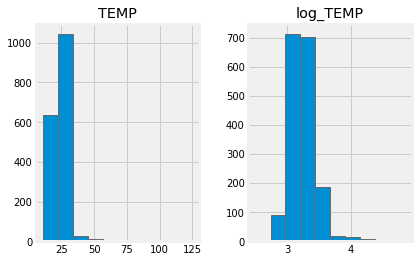

In [10]:
# create new dataframe to comapre original vs log data

dist_df= pd.DataFrame({'TEMP': df2['TEMP'].values, 'log_TEMP': dataset[:,0]})

# histogram plot original vs log data
plt.figure(figsize=(12,5))
dist_df.hist();

In [11]:
# split dataset into train and test set

train_size= int(len(dataset) * 0.75)
test_size= len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1301 434


In [12]:
# convert an array of values into dataset matrix

def create_dataset(dataset, look_back=1):
    dataX, dataY= [], []
    for i in range (len(dataset)-look_back-1):
        a= dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape train and test data

look_back= 1
trainX, trainY= create_dataset(train, look_back)
testX, testY= create_dataset(train, look_back)

print('Shape of trainX: ', trainX.shape)
print('Shape of trainY: ', trainY.shape)
print('Shape of testX: ', testX.shape)
print('Shape of testY: ', testY.shape)

Shape of trainX:  (1299, 1)
Shape of trainY:  (1299,)
Shape of testX:  (1299, 1)
Shape of testY:  (1299,)


In [13]:
# reshape the input array in the form [sample, time steps, features]

trainX= np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX= np.reshape(testX, (trainX.shape[0], 1, testX.shape[1]))

print('Shape of TrainX: ', trainX.shape)
print('Shape of TestX: ', testX.shape)



Shape of TrainX:  (1299, 1, 1)
Shape of TestX:  (1299, 1, 1)


In [14]:
# create and fit LSTM Neural Network

model= Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=32, verbose=2)

Epoch 1/500
41/41 - 6s - loss: 13.2428
Epoch 2/500
41/41 - 0s - loss: 11.9665
Epoch 3/500
41/41 - 0s - loss: 10.8277
Epoch 4/500
41/41 - 0s - loss: 9.6993
Epoch 5/500
41/41 - 0s - loss: 8.5217
Epoch 6/500
41/41 - 0s - loss: 7.3540
Epoch 7/500
41/41 - 0s - loss: 6.2715
Epoch 8/500
41/41 - 0s - loss: 5.3097
Epoch 9/500
41/41 - 0s - loss: 4.4653
Epoch 10/500
41/41 - 0s - loss: 3.7258
Epoch 11/500
41/41 - 0s - loss: 3.0786
Epoch 12/500
41/41 - 0s - loss: 2.5123
Epoch 13/500
41/41 - 0s - loss: 2.0207
Epoch 14/500
41/41 - 0s - loss: 1.5999
Epoch 15/500
41/41 - 0s - loss: 1.2454
Epoch 16/500
41/41 - 0s - loss: 0.9534
Epoch 17/500
41/41 - 0s - loss: 0.7187
Epoch 18/500
41/41 - 0s - loss: 0.5343
Epoch 19/500
41/41 - 0s - loss: 0.3933
Epoch 20/500
41/41 - 0s - loss: 0.2873
Epoch 21/500
41/41 - 0s - loss: 0.2098
Epoch 22/500
41/41 - 0s - loss: 0.1539
Epoch 23/500
41/41 - 0s - loss: 0.1145
Epoch 24/500
41/41 - 0s - loss: 0.0874
Epoch 25/500
41/41 - 0s - loss: 0.0690
Epoch 26/500
41/41 - 0s - loss:

Epoch 209/500
41/41 - 0s - loss: 0.0322
Epoch 210/500
41/41 - 0s - loss: 0.0323
Epoch 211/500
41/41 - 0s - loss: 0.0324
Epoch 212/500
41/41 - 0s - loss: 0.0322
Epoch 213/500
41/41 - 0s - loss: 0.0322
Epoch 214/500
41/41 - 0s - loss: 0.0322
Epoch 215/500
41/41 - 0s - loss: 0.0323
Epoch 216/500
41/41 - 0s - loss: 0.0321
Epoch 217/500
41/41 - 0s - loss: 0.0323
Epoch 218/500
41/41 - 0s - loss: 0.0325
Epoch 219/500
41/41 - 0s - loss: 0.0323
Epoch 220/500
41/41 - 0s - loss: 0.0322
Epoch 221/500
41/41 - 0s - loss: 0.0322
Epoch 222/500
41/41 - 0s - loss: 0.0322
Epoch 223/500
41/41 - 0s - loss: 0.0321
Epoch 224/500
41/41 - 0s - loss: 0.0321
Epoch 225/500
41/41 - 0s - loss: 0.0321
Epoch 226/500
41/41 - 0s - loss: 0.0321
Epoch 227/500
41/41 - 0s - loss: 0.0321
Epoch 228/500
41/41 - 0s - loss: 0.0323
Epoch 229/500
41/41 - 0s - loss: 0.0321
Epoch 230/500
41/41 - 0s - loss: 0.0322
Epoch 231/500
41/41 - 0s - loss: 0.0323
Epoch 232/500
41/41 - 0s - loss: 0.0321
Epoch 233/500
41/41 - 0s - loss: 0.0321


Epoch 414/500
41/41 - 0s - loss: 0.0321
Epoch 415/500
41/41 - 0s - loss: 0.0320
Epoch 416/500
41/41 - 0s - loss: 0.0319
Epoch 417/500
41/41 - 0s - loss: 0.0322
Epoch 418/500
41/41 - 0s - loss: 0.0320
Epoch 419/500
41/41 - 0s - loss: 0.0322
Epoch 420/500
41/41 - 0s - loss: 0.0321
Epoch 421/500
41/41 - 0s - loss: 0.0322
Epoch 422/500
41/41 - 0s - loss: 0.0320
Epoch 423/500
41/41 - 0s - loss: 0.0321
Epoch 424/500
41/41 - 0s - loss: 0.0320
Epoch 425/500
41/41 - 0s - loss: 0.0319
Epoch 426/500
41/41 - 0s - loss: 0.0319
Epoch 427/500
41/41 - 0s - loss: 0.0319
Epoch 428/500
41/41 - 0s - loss: 0.0319
Epoch 429/500
41/41 - 0s - loss: 0.0319
Epoch 430/500
41/41 - 0s - loss: 0.0323
Epoch 431/500
41/41 - 0s - loss: 0.0319
Epoch 432/500
41/41 - 0s - loss: 0.0319
Epoch 433/500
41/41 - 0s - loss: 0.0322
Epoch 434/500
41/41 - 0s - loss: 0.0320
Epoch 435/500
41/41 - 0s - loss: 0.0320
Epoch 436/500
41/41 - 0s - loss: 0.0320
Epoch 437/500
41/41 - 0s - loss: 0.0319
Epoch 438/500
41/41 - 0s - loss: 0.0320


In [16]:
# make predictions
trainPredict= model.predict(trainX)
testPredict= model.predict(testX)
testPredict

array([[3.1746597],
       [3.1519504],
       [3.143252 ],
       ...,
       [3.232656 ],
       [3.1826642],
       [3.1641724]], dtype=float32)

In [17]:
# Invert predictions
trainPredict= np.expm1(trainPredict)
trainY= np.expm1(trainY)

testPredict= np.expm1(testPredict)
testY= np.expm1(testY)

In [18]:
# calculate root mean squared error
trainScore= math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore= math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6.67 RMSE
Test Score: 6.67 RMSE
